In [1]:
import os
import re
import zipfile
from pycocotools.coco import COCO
import numpy as np
import tensorflow as tf
from tensorflow import keras

from PIL import Image
import matplotlib
%matplotlib inline
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import skimage.io
import skimage.transform
import skimage.color
import skimage
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import os
from sklearn.model_selection import train_test_split
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
#train_list
dataDir='..'
dataType='train2017'
annFile='{}/datasets/coco_2017/annotations/instances_{}.json'.format(dataDir, dataType)
coco=COCO(annFile)
root_dir='../datasets/coco_2017/images/'
set_name='train2017_resize224/'


loading annotations into memory...
Done (t=9.22s)
creating index...
index created!


In [3]:
#train_ids
categories = coco.loadCats(coco.getCatIds())
categories.sort(key=lambda x: x['id'])
image_ids = coco.getImgIds()
len(image_ids)

118287

In [4]:
#val_list
dataDir='..'
dataType2='val2017'
annFile='{}/datasets/coco_2017/annotations/instances_{}.json'.format(dataDir, dataType2)
coco2=COCO(annFile)
root_dir2='../datasets/coco_2017/images/'
set_name2='val2017_resize224/'

loading annotations into memory...
Done (t=0.29s)
creating index...
index created!


In [5]:
#val_ids
categories2 = coco2.loadCats(coco2.getCatIds())
categories2.sort(key=lambda x: x['id'])
image_ids2 = coco2.getImgIds()
len(image_ids2)

5000

In [6]:
#category = 80
category_dict = {(1,0), (2,1), (3,2), (4,3), (5,4), (6,5), (7,6), (8,7), (9,8), (10,9), (11,10), (13,11), (14, 12), (15, 13), (16, 14), (17, 15), (18, 16), (19, 17),
(20, 18), (21, 19), (22, 20), (23, 21), (24, 22) , (25, 23), (27, 24), (28, 25), (31, 26), (32, 27), (33, 38), (34, 29), (35, 30), (36, 31), (37, 32), (38,33), (39, 34),
(40, 35), (41, 36), (42, 37), (43 ,38), (44 , 39), (46 , 40), (47 ,41), (48,42), (49 ,43), (50 , 44), (51, 45), (52, 46),  (53, 47), (54 , 48), (55 , 49), (56, 50), (57 , 51),
(58 , 52), (59 , 53), (60, 54), (61, 55), (62, 56), (63, 57), (64, 58), (65, 59), (67, 60), (70 , 61), (72, 62), (73 , 63), (74, 64), (75 , 65), (76 , 66), (77 , 67), (78 , 68),
(79 , 69),(80 , 70), (81 , 71), (82 , 72), (84 , 73), (85 , 74), (86 , 75), (87, 76), (88 , 77), (89 , 78), (90 , 79)}

In [7]:
#category = 10
category_dict2 = {(1,0), (2,1), (3,1), (4,1), (5,1), (6,1), (7,1), (8,1), (9,1), (10,2), (11,2), (13,2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2),
(20, 2), (21, 2), (22, 2), (23, 2), (24, 2) , (25, 2), (27, 3), (28, 3), (31, 3), (32, 3), (33, 3), (34, 3), (35, 3), (36, 3), (37, 3), (38,3), (39, 3),
(40, 3), (41, 3), (42, 3), (43 ,3), (44 , 4), (46 , 4), (47 ,4), (48,4), (49 ,4), (50 , 4), (51, 4), (52, 5),  (53, 5), (54 , 5), (55 , 5), (56, 5), (57 , 5),
(58 , 5), (59 , 5), (60, 5), (61, 5), (62, 6), (63, 6), (64, 6), (65, 6), (67, 6), (70 , 6), (72, 7), (73 , 7), (74, 7), (75 , 7), (76 , 7), (77 , 7), (78 , 8),
(79 , 8),(80 , 8), (81 , 8), (82 , 8), (84 , 9), (85 , 9), (86 , 9), (87, 9), (88 , 9), (89 , 9), (90 , 9)}


In [8]:

def create_multi_imagelist(num: int):
    img_list = []


    labels_list= []
    index_list = []
    for i in range(num):
        
        image_info = coco.loadImgs(image_ids[i])[0]
        path = os.path.join(root_dir, set_name, image_info['file_name'])
        img = Image.open(path)
        imgarray = np.array(img)
        annotations_ids =coco.getAnnIds(imgIds=image_ids[i], iscrowd=False)
        label =[]
        if imgarray.ndim == 3 and annotations_ids:
                
                img_list.append(imgarray)
                
                coco_annotations = coco.loadAnns(annotations_ids)
                
                label = [0 for i in range(10)]
                for index in range(len(coco_annotations)):
                    
                    category_id = coco_annotations[index]['category_id']
                
                    for c,d in category_dict2:
                        if c == category_id:
                            label[d] = 1
                labels_list.append(label)
        
                    
    return np.asarray(img_list), np.asarray(labels_list)
            


In [15]:

def create_multi_val_imagelist(num: int):
    img_list = []
    labels_list = []
    for i in range(num):
    
        image_info = coco2.loadImgs(image_ids2[i])[0]
        path = os.path.join(root_dir2, set_name2, image_info['file_name'])
        img = Image.open(path)
        imgarray = np.array(img)
        annotations_ids =coco2.getAnnIds(imgIds=image_ids2[i], iscrowd=False)
        if imgarray.ndim == 3 and annotations_ids:
                
                img_list.append(imgarray)
               
                coco_annotations = coco2.loadAnns(annotations_ids)
                
                
                label = [0 for i in range(10)]
                for index in range(len(coco_annotations)):
                    
                    category_id = coco_annotations[index]['category_id']
                    for c,d in category_dict2:
                        if c == category_id:
                            label[d] = 1
                labels_list.append(label)
              
    return np.asarray(img_list), np.asarray(labels_list)
                

In [10]:
X, Y = create_multi_imagelist(50000)
X.shape, Y.shape

((49551, 224, 224, 3), (49551, 10))

In [11]:
Y[10]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 1])

In [16]:
X_test, Y_test = create_multi_val_imagelist(5000)
X_test.shape, Y_test.shape

((4952, 224, 224, 3), (4952, 10))

In [17]:
X[0].shape

(224, 224, 3)

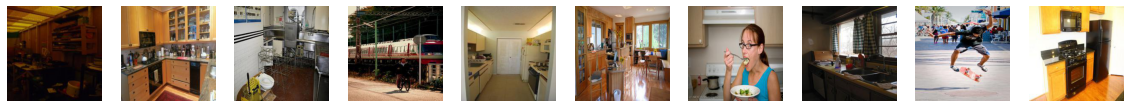

In [18]:
fig,ax = plt.subplots(nrows=1,ncols=10,figsize=(20,20))
for i in range(10):
    ax[i].imshow(X[i+10])
    ax[i].axis('off')
    
#     c_list = []
#     for x in np.where(Y[i] == 1):
#         for c,d in category_dict:
#             if d == x:
#                 print(c, end= ' ')
    
            
     


In [19]:
def hard_swish(features):

  
  features = tf.convert_to_tensor(features)
  fdtype = features.dtype
  return features * tf.nn.relu6(features + tf.cast(3., fdtype)) * (1. / 6.)


In [20]:
def se_block(inputs, ch, ratio=16):

    x = tf.keras.layers.GlobalAveragePooling2D()(inputs)
    x = tf.keras.layers.Dense(ch//ratio, activation='relu')(x)
    y = tf.keras.layers.Dense(ch, activation='sigmoid')(x)
    y = tf.keras.layers.multiply([inputs, y])
    out = hard_swish(y)
    return out



In [21]:
def dep_bn(inputs, filter : int, kernel :int, stride: int):

  y = tf.keras.layers.Conv2D(filters = filter, kernel_size= kernel, strides= stride, padding= 'same')(inputs)
  bn = tf.keras.layers.BatchNormalization(axis = 1)(y)
  relu = tf.nn.relu6(bn)
  
  return relu 


def Inverted_residual_SEblock(x, filter : int, kernel: int, strides = int):


    #pointwise
    y = tf.keras.layers.Conv2D(filters = filter, kernel_size=  1, strides = strides, padding= 'same')(x)
    bn = tf.keras.layers.BatchNormalization(axis = 1)(y)
    y_p = tf.nn.relu6(bn)
    
    
    #depthwise
    y = tf.keras.layers.DepthwiseConv2D(kernel_size=  kernel, strides= strides, padding= 'same', depth_multiplier = 1)(y_p)
    bn = tf.keras.layers.BatchNormalization(axis = 1)(y)
    y_d = tf.nn.relu6(bn)
   
   
    #pointwise
    y = tf.keras.layers.Conv2D(filters = filter, kernel_size= 1, strides=strides, padding= 'same')(y)
    y = tf.keras.layers.BatchNormalization(axis = 1)(y)
    out = tf.keras.layers.ReLU()(y)

    if strides == 1:
        if x.shape[3] != filter : 
           x = tf.keras.layers.Conv2D(filters = filter, kernel_size = 1, strides = strides, padding = "same")(x)
        out  = tf.keras.layers.Add()([x, out])
   
    y = se_block(out, filter)

    #pointwise
    y = tf.keras.layers.Conv2D(filters = filter, kernel_size= 1, strides=strides, padding= 'same')(y)
    y = tf.keras.layers.BatchNormalization(axis = 1)(y)
    out = tf.nn.relu6(y)


    return out


In [22]:
def create_mobilenetV3(inputs):

   x = dep_bn(inputs, 16, 3, 2)
   x = Inverted_residual_SEblock(x, 16, 3, 1)
   x = Inverted_residual_SEblock(x, 16, 3, 2)
   x = Inverted_residual_SEblock(x, 24, 3, 1)
   x = Inverted_residual_SEblock(x, 24, 5, 2)
   x = Inverted_residual_SEblock(x, 40, 5, 1)
   x = Inverted_residual_SEblock(x, 40, 5, 1)
   x = Inverted_residual_SEblock(x, 40, 3, 2)
   x = Inverted_residual_SEblock(x, 80, 3, 1)
   x = Inverted_residual_SEblock(x, 80, 3, 1)
   x = Inverted_residual_SEblock(x, 80, 3, 1)
   x = Inverted_residual_SEblock(x, 80, 3, 1)
   x = Inverted_residual_SEblock(x, 112, 3, 1)
   x = Inverted_residual_SEblock(x, 112, 5, 1)
   x = Inverted_residual_SEblock(x, 160, 5, 1)
   x = dep_bn(x, 160, 1, 1)
   
   t = tf.keras.layers.AveragePooling2D(1)(x)
   t = tf.keras.layers.Flatten()(t)
   outputs = tf.keras.layers.Dense(10, activation='softmax')(t)
   return outputs

In [23]:
inputs = tf.keras.Input(shape=(224,224,3))
outputs = create_mobilenetV3(inputs)

model = tf.keras.Model(inputs, outputs)
EPOCHS = 30
BS = 64
opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(
        optimizer=opt,
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

In [29]:
inputs = tf.keras.Input(shape=(224,224,3))
outputs = create_mobilenetV3(inputs)

model = tf.keras.Model(inputs, outputs)
EPOCHS = 30
INIT_LR = 1e-3
BS = 64
opt = tf.keras.optimizers.Adam(learning_rate=INIT_LR, decay=INIT_LR/ EPOCHS)
model.compile(
        optimizer=opt,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

In [31]:
predictions = model.predict(X_test[:5])
predictions

array([[3.86927456e-01, 6.41952008e-02, 1.00950569e-01, 1.30363181e-01,
        5.53109273e-02, 2.84921490e-02, 1.06437720e-01, 5.28671592e-02,
        1.70894489e-02, 5.73661812e-02],
       [1.68541014e-01, 6.45932509e-03, 3.37945893e-02, 3.48109528e-02,
        1.38958752e-01, 4.65577915e-02, 3.20941299e-01, 7.94180110e-02,
        7.82110691e-02, 9.23072100e-02],
       [2.71846205e-01, 9.94636938e-02, 4.51366097e-01, 1.36841089e-01,
        5.98276313e-03, 5.26514556e-03, 1.63033623e-02, 3.42542562e-03,
        3.12082411e-04, 9.19414498e-03],
       [2.07176864e-01, 7.71040097e-02, 5.76728582e-01, 1.06240526e-01,
        4.91301063e-03, 4.81122825e-03, 1.32521568e-02, 2.38894532e-03,
        1.78139948e-04, 7.20650516e-03],
       [1.15200870e-01, 4.35074270e-02, 7.60840237e-01, 6.06708974e-02,
        2.99503631e-03, 3.44208861e-03, 8.08741618e-03, 1.09898567e-03,
        5.71019009e-05, 4.09996277e-03]], dtype=float32)

In [ ]:
model.fit(
    X,
    Y,
    epochs=30,
    verbose=1,
    validation_data=(X_test, Y_test),
    batch_size= 64
)

In [13]:
model = keras.models.load_model("model0712")

In [23]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true, Y_pred).shape)
confusion_matrix(y_true, Y_pred)

(10, 10)


array([[2693,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [ 432,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [ 779,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [  70,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [ 396,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [ 152,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [ 211,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [  49,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [  42,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [ 128,    0,    0,    0,    0,    0,    0,    0,    0,    0]])

In [20]:
y_tlist =[]
for y_t in Y_test:
    y_tlist.append(np.argmax(y_t))
y_true = np.asarray(y_tlist)
y_true.shape

(4952,)

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_true, Y_pred))

              precision    recall  f1-score   support

           0       0.54      1.00      0.70      2693
           1       0.00      0.00      0.00       432
           2       0.00      0.00      0.00       779
           3       0.00      0.00      0.00        70
           4       0.00      0.00      0.00       396
           5       0.00      0.00      0.00       152
           6       0.00      0.00      0.00       211
           7       0.00      0.00      0.00        49
           8       0.00      0.00      0.00        42
           9       0.00      0.00      0.00       128

    accuracy                           0.54      4952
   macro avg       0.05      0.10      0.07      4952
weighted avg       0.30      0.54      0.38      4952



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
def __get_input(image_index):
        
        
        image_info = coco.loadImgs(image_ids[image_index])[0]
        path = os.path.join(root_dir, set_name, image_info['file_name'])
        img = Image.open(path)
        imgarray = np.array(img)
        annotations_ids =coco.getAnnIds(imgIds=image_ids[image_index], iscrowd=False)
    
        if imgarray.ndim == 3 and annotations_ids:
                
             
                coco_annotations = coco.loadAnns(annotations_ids)
                areas =[]
                areas.append(x['area'] for x in coco_annotations)
                index = np.argmax(areas)
                category_id = coco_annotations[index]['category_id']
    
                for c,d in category_dict:
                    if c == category_id:
                        label = [0 for i in range(80)]
                        label[d] = 1
                
                return imgarray, label
